In [1]:
import pandas_datareader as pdr
import datetime as dt
import pandas as pd
import numpy as np

In [2]:
tickers = ['AAPL','MSFT','TWTR','IBM']
start = dt.datetime(2016,1,1)

data = pdr.get_data_yahoo(tickers,start)

In [3]:
data = data['Adj Close']

In [4]:
data.tail()

Symbols,AAPL,MSFT,TWTR,IBM
Date,,,,
2022-07-25,152.949997,258.829987,39.240002,128.539993
2022-07-26,151.600006,251.899994,39.340000,128.080002
2022-07-27,156.789993,268.739990,39.849998,129.119995
2022-07-28,157.350006,276.410004,40.889999,129.220001
2022-07-29,162.509995,280.739990,41.610001,130.789993


In [5]:
log_returns = np.log(data / data.shift())

In [6]:
log_returns.head()

Symbols,AAPL,MSFT,TWTR,IBM
Date,,,,
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,-0.025379,0.004552,-0.028779,-0.000736
2016-01-06,-0.019764,-0.018332,-0.024476,-0.005018
2016-01-07,-0.043121,-0.035402,-0.054275,-0.017237
2016-01-08,0.005274,0.003062,-0.013917,-0.009301


In [7]:
weight = np.random.random(4)

In [8]:
weight /= weight.sum()

In [9]:
weight

array([0.33602891, 0.3310623 , 0.25461627, 0.07829253])

In [10]:
log_returns = log_returns.dropna()

In [11]:
log_returns.head()

Symbols,AAPL,MSFT,TWTR,IBM
Date,,,,
2016-01-05,-0.025379,0.004552,-0.028779,-0.000736
2016-01-06,-0.019764,-0.018332,-0.024476,-0.005018
2016-01-07,-0.043121,-0.035402,-0.054275,-0.017237
2016-01-08,0.005274,0.003062,-0.013917,-0.009301
2016-01-11,0.016063,-0.000573,-0.016654,0.012082


In [12]:
exp_rtn = np.dot(log_returns.mean(), weight)*252

In [13]:
exp_vol = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov()*252,weight)))

In [14]:
sharpe_ratio = exp_rtn / exp_vol

In [15]:
#Monte carlo simulation

n = 5000


weights = np.zeros((n,4))
exp_rtns = np.zeros(n)
exp_vols = np.zeros(n)
sharpe_ratios = np.zeros(n)


for i in range(n):
    weight = np.random.random(4)
    weight /= weight.sum()
    weights[i] = weight
    
    exp_rtns[i] = np.sum(log_returns.mean()*weight)*252
    exp_vols[i] = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov()*252, weight)))
    sharpe_ratios[i] = exp_rtns[i] / exp_vols[i]
    


In [16]:
import matplotlib.pyplot as plt


In [17]:
#Highest Sharpe ratio portfolio

high_sharpe = exp_vols[sharpe_ratios.argmax()]
high_sharpe_returns = exp_rtns[sharpe_ratios.argmax()]



<IPython.core.display.Javascript object>


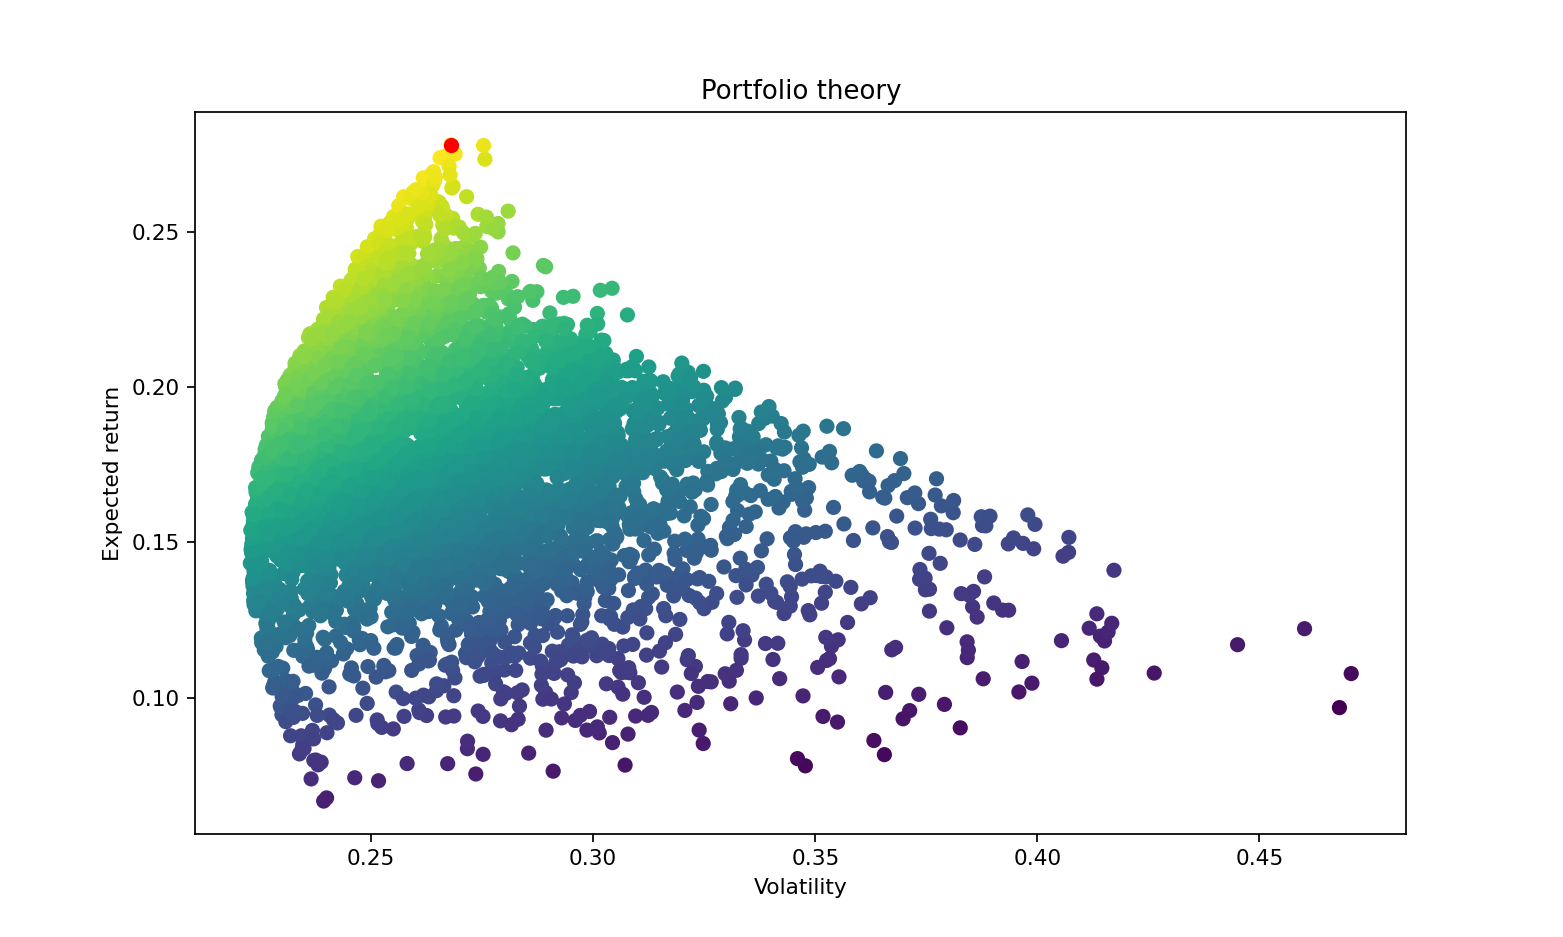

Text(0, 0.5, 'Expected return')

In [91]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(exp_vols,exp_rtns,c=sharpe_ratios)
ax.set_title('Portfolio theory')
ax.scatter(exp_vols[sharpe_ratios.argmax()],exp_rtns[sharpe_ratios.argmax()],c='r')
ax.set_xlabel('Volatility')
ax.set_ylabel('Expected return')
